In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('real_estate_data.csv')


In [7]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [5]:
pd.set_option('display.max_columns',100)

In [9]:
print(data.dtypes)

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object


In [11]:
print(data.select_dtypes(include = ['object']).isnull().sum())

property_type       0
exterior_walls    223
roof              354
dtype: int64


In [17]:
print(data.select_dtypes(exclude = ['object']).isnull().sum())

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64


In [19]:
print(data.basement.unique())

[nan  1.]


In [31]:
data.loc[data['basement']!=1,['basement']]=[0]


In [32]:
print(data.select_dtypes(exclude = ['object']).isnull().sum())

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64


In [33]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


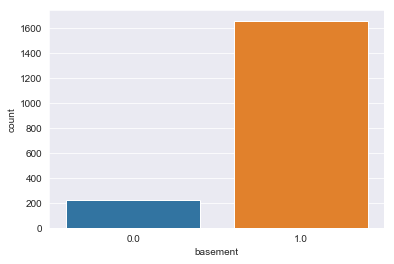

In [43]:

sns.countplot(x=data.basement)
plt.show()


In [46]:
print(data.describe())

            tx_price         beds        baths         sqft   year_built  \
count    1883.000000  1883.000000  1883.000000  1883.000000  1883.000000   
mean   422839.807754     3.420605     2.579926  2329.398832  1982.963887   
std    151462.593276     1.068554     0.945576  1336.991858    20.295945   
min    200000.000000     1.000000     1.000000   500.000000  1880.000000   
25%    300000.000000     3.000000     2.000000  1345.000000  1970.000000   
50%    392000.000000     3.000000     3.000000  1907.000000  1986.000000   
75%    525000.000000     4.000000     3.000000  3005.000000  2000.000000   
max    800000.000000     5.000000     6.000000  8450.000000  2015.000000   

           lot_size     basement  restaurants    groceries    nightlife  \
count  1.883000e+03  1883.000000  1883.000000  1883.000000  1883.000000   
mean   1.339262e+04     0.879979    40.210303     4.505045     5.074881   
std    4.494930e+04     0.325073    46.867012     4.491029     8.464668   
min    0.000000

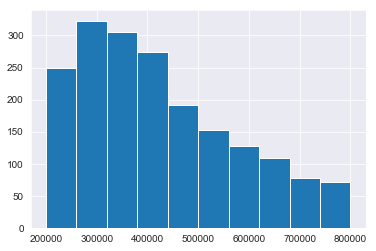

In [48]:
data.tx_price.hist()
plt.show()

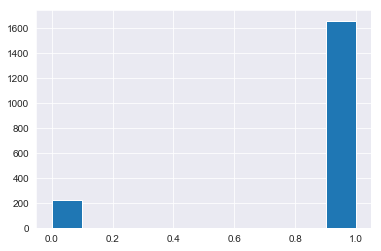

In [49]:
data.basement.hist()
plt.show()

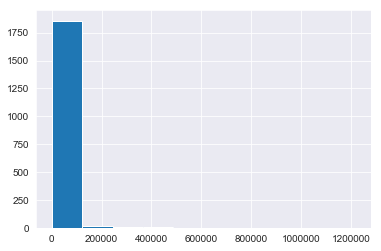

In [50]:
data.lot_size.hist()
plt.show()

In [52]:
data.lot_size.describe()

count    1.883000e+03
mean     1.339262e+04
std      4.494930e+04
min      0.000000e+00
25%      1.542000e+03
50%      6.098000e+03
75%      1.176100e+04
max      1.220551e+06
Name: lot_size, dtype: float64

In [72]:
(data.sort_values(by = ['lot_size'],ascending = False))[['lot_size','basement']].head()

,lot_size,basement
102,1220551,0.0
1111,436471,1.0
1832,436035,1.0
1876,436035,1.0
1839,435600,1.0
